In [16]:
import os
import cv2
import pandas as pd
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from PIL import Image
import copy

In [17]:
DATA_DIR = 'slovo'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')
ANNOTATIONS_DIR = os.path.join(DATA_DIR, 'annotations')
ann = pd.read_csv(os.path.join(DATA_DIR, 'annotations.csv'), sep='\t')
ann

,attachment_id,text,user_id,height,width,length,train
0,44e8d2a0-7e01-450b-90b0-beb7400d2c1e,Ё,185bd3a81d9d618518d10abebf0d17a8,1920,1080,76.0,True
1,df5b08f0-41d1-4572-889c-8b893e71069b,А,185bd3a81d9d618518d10abebf0d17a8,1920,1080,40.0,True
2,17f53df4-c467-4aff-9f48-20687b63d49a,Р,185bd3a81d9d618518d10abebf0d17a8,1920,1080,57.0,True
3,e3add916-c708-4339-ad98-7e2740be29e9,Е,185bd3a81d9d618518d10abebf0d17a8,1920,1080,64.0,True
4,bd7272ed-1850-48f1-a2a8-c8fed523dc37,Ч,185bd3a81d9d618518d10abebf0d17a8,1920,1080,84.0,True
...,...,...,...,...,...,...,...
20395,nodca88242-2bc7-4a77-9d14-103aa1dacbd6,no_event,0041ec866777f12c384b64d8cd636277,1920,1080,42.0,False
20396,no7a7812b1-ae64-4402-9ebc-5b947edbd021,no_event,f5b82a9c82f6d870ec253e4c3fa96d83,1280,720,32.0,False
20397,no62a4df76-b48d-4f61-b6e8-bc4a1eb0cb61,no_event,4299b8ccf39ace57287b463fbe4a489b,1920,960,32.0,False
20398,no388a3f7c-3594-4332-bc78-b5b53190301d,no_event,c80b4e57f158f28299b2a89694c42329,1920,1080,41.0,False


In [18]:
', '.join(ann['text'].unique().tolist())

'Ё, А, Р, Е, Ч, Л, Ц, С, Й, З, Ь, Я, Б, Щ, У, Ы, Д, Ф, Т, Ъ, О, М, П, Х, Э, Н, В, Ю, Ш, Ж, Г, К, И, козел, гнездо, вой, креветка, бегемот, нашествие, лиса, динозавр, перо, крокодил, летучая мышь, дикое животное, попугай, ежик, волк, овца, петух, белка, пингвин, помесь, осел, дятел, воротник, аллигатор, кошка, рога, лошадь, жираф, вол, населять, верблюд, коза, ползанье, бабочка, клюв, собака, кролик, паук, водоплавающее, носорог, мышь, зверь, плавник, паучья сеть, животное, лев, тигр, миграция, копыто, зубы, коготь, рыба, лось, пчела, птица, комар, змея, гавканье, бык, зоопарк, клевать, акула, рычать, панда, крыса, олень, делать выводы, орел, лебедь, рычание, медведь, слон, дельфин, павлин, вилять, собачий домик, домашнее животное, курица, медуза, клетка, свинья, лягушка, голова, корм для домашних животных, корова, обезьяна, соты, крыло, заяц, прирученный, поверхностный, интеллектуальный, застенчивый, добрый, истерик, аниматор, кротость, адаптивный, амбициозный, проныра, скучный, гордый

# Daraset reduction to 100 labels

In [19]:
main_gestures = [
    "Привет!", "Пока", "да", "не", "благодарность", "Я", "мать", "отец", "сын", "дочь",
    "сестра", "брат", "ребёнок", "жена", "муж", "мужчина", "женщина", "семья", "меня",
    "тебя", "мне", "ты", "тебе", "ваш", "утро", "день", "ночь", "год", "месяц", "сегодня",
    "завтра", "вчера", "редко", "часто", "немного", "много", "больше", "тёплый", "холодный",
    "деньги", "цена", "дом", "работать", "школа", "магазин", "комната", "время",
    "дорога", "собака", "кошка", "попугай", "птица", "рыба", "дикое животное", "домашнее животное",
    "красный", "оранжевый", "желтый", "зелёный", "синий", "фиолетовый", "черный",
    "белый", "серый", "бежевый", "Золото", "серебро", "кто?", "что", "что-нибудь", "когда",
    "который", "вода", "еда", "болит", "нуждаться", "хотеть", "иметь", "быть", "любить", "ждать",
    "купить", "найти", "нравиться", "говорить", "позволить", "помочь", "терять", "добрый", "агрессивный",
    "расстроенный", "напуганный", "счастливый", "сильный", "недобрый", "красивый",
    "резервирование; бронирование", "кафетерий", "женский туалет", "мужской туалет"
]

In [20]:
ann_100 = ann[ann['text'].isin(main_gestures)]
ann_100['text'] = ann_100['text'].map(lambda x: x.lower().replace('!', '').replace('?', ''))
ann_100

,attachment_id,text,user_id,height,width,length,train
11,5ce6ce8a-d191-47d4-97b4-3fc6f9138a73,я,185bd3a81d9d618518d10abebf0d17a8,1920,1080,91.0,True
45,c9e2dbd1-ec2f-4382-a80e-5bca8396a9b1,я,46dd04a1caa75ed3082b573cb5a3ad26,1920,1080,58.0,True
92,3f72244c-7379-4403-b7ee-e1b1b8d78d46,я,db573f94204e56e0cf3fc2ea000e5bdc,1280,720,49.0,True
110,5adf08e2-4ff6-4183-ba22-446c1cd0b0f8,я,0211b488644476dd0fec656ccb9b74fc,1920,1080,50.0,True
129,13a148fc-a546-47ab-b5d0-f9d0c3cce1de,я,2d84da20c251acaeb3186642fcb04f2e,1920,1080,27.0,True
...,...,...,...,...,...,...,...
20195,74db1174-1314-43c7-bb8a-cc5cce5e2510,редко,f2dc6eab563f93d86629c1cfe479f09d,1440,1440,56.0,False
20217,5d742908-98ce-4172-bb2f-02f3595860a4,редко,798aa826b6129d33f72f62d4ba60b681,720,1280,61.0,False
20223,dfe2ff4c-98fa-4ead-b861-f499f570a321,месяц,798aa826b6129d33f72f62d4ba60b681,720,1280,58.0,False
20230,04856a31-8326-49cb-8e0c-0843c64a1d92,время,798aa826b6129d33f72f62d4ba60b681,720,1280,52.0,False


In [21]:
ann_100['text'] = ann_100['text'].map(lambda x: x.lower().replace('благодарность', 'благодарю'))

In [24]:
train_files = sorted(glob(os.path.join(TRAIN_DIR, '*')))
test_files = sorted(glob(os.path.join(TEST_DIR, '*')))
train_files = [video_path for video_path in train_files if video_path.split('\\')[-1][:-4] in ann_100['attachment_id'].values]
test_files = [video_path for video_path in test_files if video_path.split('\\')[-1][:-4] in ann_100['attachment_id'].values]

In [9]:
import shutil
output_directory = 'slovo/train_100'
os.makedirs(output_directory, exist_ok=True)

# Копирование отфильтрованных видео в новую директорию
for video_path in tqdm(train_files):
    if os.path.exists(video_path):
        shutil.copy(video_path, output_directory)
    else:
        print(f"Video {video_path} not found.")

100%|██████████| 1500/1500 [00:02<00:00, 679.39it/s]


In [10]:
output_directory = 'slovo/test_100'
os.makedirs(output_directory, exist_ok=True)

# Копирование отфильтрованных видео в новую директорию
for video_path in tqdm(test_files):
    if os.path.exists(video_path):
        shutil.copy(video_path, output_directory)
    else:
        print(f"Video {video_path} not found.")

100%|██████████| 500/500 [00:05<00:00, 93.59it/s] 


In [25]:
TRAIN_DIR = os.path.join(DATA_DIR, 'train_100')
TEST_DIR = os.path.join(DATA_DIR, 'test_100')
train_files = sorted(glob(os.path.join(TRAIN_DIR, '*')))
test_files = sorted(glob(os.path.join(TEST_DIR, '*')))

In [26]:
def get_frame_count(video_path):
    # Открыть видео файл
    video = cv2.VideoCapture(video_path)
    
    # Получить количество кадров
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Закрыть видео файл
    video.release()
    
    return frame_count

frame_counts = {}

# Проход по видеофайлам из обучающего набора с прогресс-баром
for video_path in tqdm(train_files, desc="Processing train files"):
    num_frames = get_frame_count(video_path)
    video_id = video_path.split('\\')[-1][:-4]
    frame_counts[video_id] = num_frames

# Проход по видеофайлам из тестового набора с прогресс-баром
for video_path in tqdm(test_files, desc="Processing test files"):
    num_frames = get_frame_count(video_path)
    video_id = video_path.split('\\')[-1][:-4]
    frame_counts[video_id] = num_frames

Processing train files:   0%|          | 0/1500 [00:00<?, ?it/s]

Processing test files: 100%|██████████| 500/500 [00:11<00:00, 45.17it/s]


In [27]:
ann_100['frame_count'] = ann_100['attachment_id'].map(frame_counts)

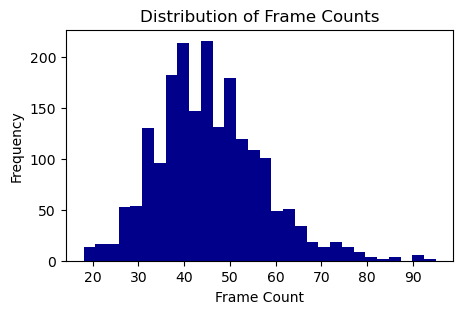

In [28]:
plt.figure(figsize=(5, 3))
plt.hist(ann_100['frame_count'], bins=30, color='darkblue')
plt.title('Distribution of Frame Counts')
plt.xlabel('Frame Count')
plt.ylabel('Frequency')
plt.show()

In [29]:
ann_100['frame_count'].describe()

count    2000.00000
mean       45.61800
std        11.66225
min        18.00000
25%        38.00000
50%        44.50000
75%        52.00000
max        95.00000
Name: frame_count, dtype: float64

In [30]:
ann_100['height_width'] = ann_100.apply(lambda row: f"{row['height']}_{row['width']}", axis=1)

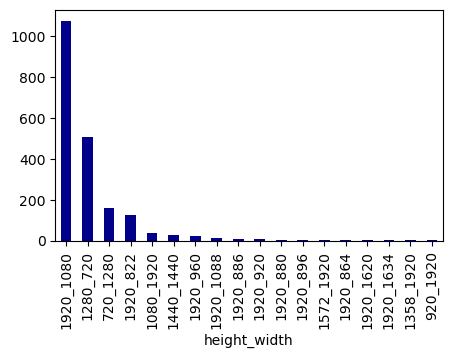

In [31]:
plt.figure(figsize=(5, 3))
ann_100['height_width'].value_counts().plot(kind='bar', color='darkblue')
plt.show()

In [32]:
ann_100.to_csv('slovo/annotations_100.csv', index=False)

# Data spliting

In [17]:
NUM_CLASSES = len(ann_100['text'].unique()) # Определение количества классов, включая класс "no-action"
classes = {label: label_id for label, label_id in zip(ann_100['text'].unique(), range(NUM_CLASSES))} # Создание словаря классов, где каждому классу соответствует уникальный идентификатор

ann_train = []

for file in tqdm(train_files):
    video_id = file.split('\\')[-1][:-4] # Извлечение идентификатора видео из имени файла (без расширения)
    label = ann_100[ann_100['attachment_id'] == video_id]['text'].to_string(index=False) # Получение метки (label) для текущего видео на основе идентификатора видео
    class_id = classes[label]
    line = [video_id, class_id]
    ann_train.append(line)

100%|██████████| 1500/1500 [00:00<00:00, 2132.43it/s]


In [18]:
ann_test = []

for file in tqdm(test_files):
    video_id = file.split('\\')[-1][:-4] # Извлечение идентификатора видео из имени файла (без расширения)
    label = ann_100[ann_100['attachment_id'] == video_id]['text'].to_string(index=False) # Получение метки (label) для текущего видео на основе идентификатора видео
    class_id = classes[label]
    line = [video_id, class_id]
    ann_test.append(line)

100%|██████████| 500/500 [00:00<00:00, 1378.24it/s]


In [19]:
video_files_train, label_train = zip(*map(lambda x: (x[0], x[1]), ann_train))
video_files_test, label_test = zip(*map(lambda x: (x[0], x[1]), ann_test))

In [24]:
len(ann_test)

500

In [25]:
video_files_train, video_files_val, label_train, label_val = train_test_split(video_files_train, label_train, test_size=0.2, stratify=label_train, random_state=42)

In [26]:
# Подсчет количества меток каждого класса
unique, counts = np.unique(label_test, return_counts=True)
counts

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [27]:
# Создание DataFrame для тренировочной выборки
train_data = pd.DataFrame({
    "video_file": video_files_train,
    "label": label_train
})

# Создание DataFrame для валидационной выборки
val_data = pd.DataFrame({
    "video_file": video_files_val,
    "label": label_val
})

# Создание DataFrame для тестовой выборки
test_data = pd.DataFrame({
    "video_file": video_files_test,
    "label": label_test
})

class_data = pd.DataFrame(list(classes.items()), columns=['class_name', 'label'])

# Сохранение DataFrame в CSV файлы
train_data.to_csv("train_data_2.csv", index=False)
val_data.to_csv("val_data_2.csv", index=False)
test_data.to_csv("test_data_2.csv", index=False)
class_data.to_csv("class_data_2.csv", index=False)

In [34]:
NUM_CLASSES = len(ann_100['text'].unique()) # Определение количества классов, включая класс "no-action"
classes = {label: label_id for label, label_id in zip(ann_100['text'].unique(), range(NUM_CLASSES))} # Создание словаря классов, где каждому классу соответствует уникальный идентификатор
class_data = pd.DataFrame(list(classes.items()), columns=['class_name', 'label'])
class_data.to_csv("class_data_3.csv", index=False)

In [3]:
DATA_DIR = 'slovo'
TRAIN_DIR = os.path.join(DATA_DIR, 'train_100')
TEST_DIR = os.path.join(DATA_DIR, 'test_100')
train_files = sorted(glob(os.path.join(TRAIN_DIR, '*')))
test_files = sorted(glob(os.path.join(TEST_DIR, '*')))

In [10]:
def get_fps_count(video_path):
    # Открыть видео файл
    video = cv2.VideoCapture(video_path)
    
    # Получить количество кадров
    fps = int(video.get(cv2.CAP_PROP_FPS)) 
    
    # Закрыть видео файл
    video.release()
    
    return fps

fps_dict = {}

# Проход по видеофайлам из обучающего набора с прогресс-баром
for video_path in tqdm(train_files, desc="Processing train files"):
    fps = get_fps_count(video_path)
    video_id = video_path.split('\\')[-1][:-4]
    fps_dict[video_id] = fps

# Проход по видеофайлам из тестового набора с прогресс-баром
for video_path in tqdm(test_files, desc="Processing test files"):
    fps = get_fps_count(video_path)
    video_id = video_path.split('\\')[-1][:-4]
    fps_dict[video_id] = fps

Processing test files: 100%|██████████| 500/500 [00:06<00:00, 72.52it/s]


In [11]:
ann_100 = pd.read_csv(os.path.join(DATA_DIR, 'annotations_100.csv'))
ann_100

,attachment_id,text,user_id,height,width,length,train,frame_count,height_width
0,5ce6ce8a-d191-47d4-97b4-3fc6f9138a73,я,185bd3a81d9d618518d10abebf0d17a8,1920,1080,91.0,True,51,1920_1080
1,c9e2dbd1-ec2f-4382-a80e-5bca8396a9b1,я,46dd04a1caa75ed3082b573cb5a3ad26,1920,1080,58.0,True,58,1920_1080
2,3f72244c-7379-4403-b7ee-e1b1b8d78d46,я,db573f94204e56e0cf3fc2ea000e5bdc,1280,720,49.0,True,49,1280_720
3,5adf08e2-4ff6-4183-ba22-446c1cd0b0f8,я,0211b488644476dd0fec656ccb9b74fc,1920,1080,50.0,True,50,1920_1080
4,13a148fc-a546-47ab-b5d0-f9d0c3cce1de,я,2d84da20c251acaeb3186642fcb04f2e,1920,1080,27.0,True,27,1920_1080
...,...,...,...,...,...,...,...,...,...
1995,74db1174-1314-43c7-bb8a-cc5cce5e2510,редко,f2dc6eab563f93d86629c1cfe479f09d,1440,1440,56.0,False,56,1440_1440
1996,5d742908-98ce-4172-bb2f-02f3595860a4,редко,798aa826b6129d33f72f62d4ba60b681,720,1280,61.0,False,61,720_1280
1997,dfe2ff4c-98fa-4ead-b861-f499f570a321,месяц,798aa826b6129d33f72f62d4ba60b681,720,1280,58.0,False,58,720_1280
1998,04856a31-8326-49cb-8e0c-0843c64a1d92,время,798aa826b6129d33f72f62d4ba60b681,720,1280,52.0,False,52,720_1280


In [13]:
ann_100['fps'] = ann_100['attachment_id'].map(fps_dict)

In [14]:
fps

30

In [16]:
ann_100['fps'].value_counts()

fps
30    2000
Name: count, dtype: int64